In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [2]:
%matplotlib inline
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----

notebook_theme = 'carrot'
color_maps = {'turquoise': ['#1abc9c', '#e8f8f5', '#d1f2eb', '#a3e4d7', '#76d7c4', '#48c9b0', '#1abc9c', '#17a589', '#148f77', '#117864', '#0e6251'], 'green': ['#16a085', '#e8f6f3', '#d0ece7', '#a2d9ce', '#73c6b6', '#45b39d', '#16a085', '#138d75', '#117a65', '#0e6655', '#0b5345'], 'emerald': ['#2ecc71', '#eafaf1', '#d5f5e3', '#abebc6', '#82e0aa', '#58d68d', '#2ecc71', '#28b463', '#239b56', '#1d8348', '#186a3b'], 'nephritis': ['#27ae60', '#e9f7ef', '#d4efdf', '#a9dfbf', '#7dcea0', '#52be80', '#27ae60', '#229954', '#1e8449', '#196f3d', '#145a32'], 'peter': ['#3498db', '#ebf5fb', '#d6eaf8', '#aed6f1', '#85c1e9', '#5dade2', '#3498db', '#2e86c1', '#2874a6', '#21618c', '#1b4f72'], 'belize': ['#2980b9', '#eaf2f8', '#d4e6f1', '#a9cce3', '#7fb3d5', '#5499c7', '#2980b9', '#2471a3', '#1f618d', '#1a5276', '#154360'], 'amethyst': ['#9b59b6', '#f5eef8', '#ebdef0', '#d7bde2', '#c39bd3', '#af7ac5', '#9b59b6', '#884ea0', '#76448a', '#633974', '#512e5f'], 'wisteria': ['#8e44ad', '#f4ecf7', '#e8daef', '#d2b4de', '#bb8fce', '#a569bd', '#8e44ad', '#7d3c98', '#6c3483', '#5b2c6f', '#4a235a'], 'wet': ['#34495e', '#ebedef', '#d6dbdf', '#aeb6bf', '#85929e', '#5d6d7e', '#34495e', '#2e4053', '#283747', '#212f3c', '#1b2631'], 'midnight': ['#2c3e50', '#eaecee', '#d5d8dc', '#abb2b9', '#808b96', '#566573', '#2c3e50', '#273746', '#212f3d', '#1c2833', '#17202a'], 'sunflower': ['#f1c40f', '#fef9e7', '#fcf3cf', '#f9e79f', '#f7dc6f', '#f4d03f', '#f1c40f', '#d4ac0d', '#b7950b', '#9a7d0a', '#7d6608'], 'orange': ['#f39c12', '#fef5e7', '#fdebd0', '#fad7a0', '#f8c471', '#f5b041', '#f39c12', '#d68910', '#b9770e', '#9c640c', '#7e5109'], 'carrot': ['#e67e22', '#fdf2e9', '#fae5d3', '#f5cba7', '#f0b27a', '#eb984e', '#e67e22', '#ca6f1e', '#af601a', '#935116', '#784212'], 'pumpkin': ['#d35400', '#fbeee6', '#f6ddcc', '#edbb99', '#e59866', '#dc7633', '#d35400', '#ba4a00', '#a04000', '#873600', '#6e2c00'], 'alizarin': ['#e74c3c', '#fdedec', '#fadbd8', '#f5b7b1', '#f1948a', '#ec7063', '#e74c3c', '#cb4335', '#b03a2e', '#943126', '#78281f'], 'pomegranate': ['#c0392b', '#f9ebea', '#f2d7d5', '#e6b0aa', '#d98880', '#cd6155', '#c0392b', '#a93226', '#922b21', '#7b241c', '#641e16'], 'clouds': ['#ecf0f1', '#fdfefe', '#fbfcfc', '#f7f9f9', '#f4f6f7', '#f0f3f4', '#ecf0f1', '#d0d3d4', '#b3b6b7', '#979a9a', '#7b7d7d'], 'silver': ['#bdc3c7', '#f8f9f9', '#f2f3f4', '#e5e7e9', '#d7dbdd', '#cacfd2', '#bdc3c7', '#a6acaf', '#909497', '#797d7f', '#626567'], 'concrete': ['#95a5a6', '#f4f6f6', '#eaeded', '#d5dbdb', '#bfc9ca', '#aab7b8', '#95a5a6', '#839192', '#717d7e', '#5f6a6a', '#4d5656'], 'asbestos': ['#7f8c8d', '#f2f4f4', '#e5e8e8', '#ccd1d1', '#b2babb', '#99a3a4', '#7f8c8d', '#707b7c', '#616a6b', '#515a5a', '#424949']}
# color_maps = {'red': ['#f44336', '#ffebee', '#ffcdd2', '#ef9a9a', '#e57373', '#ef5350', '#f44336', '#e53935', '#d32f2f', '#c62828', '#b71c1c', '#ff8a80', '#ff5252', '#ff1744', '#d50000'], 'pink': ['#e91e63', '#fce4ec', '#f8bbd0', '#f48fb1', '#f06292', '#ec407a', '#e91e63', '#d81b60', '#c2185b', '#ad1457', '#880e4f', '#ff80ab', '#ff4081', '#f50057', '#c51162'], 'purple': ['#9c27b0', '#f3e5f5', '#e1bee7', '#ce93d8', '#ba68c8', '#ab47bc', '#9c27b0', '#8e24aa', '#7b1fa2', '#6a1b9a', '#4a148c', '#ea80fc', '#e040fb', '#d500f9', '#aa00ff'], 'deep': ['#673ab7', '#ede7f6', '#d1c4e9', '#b39ddb', '#9575cd', '#7e57c2', '#673ab7', '#5e35b1', '#512da8', '#4527a0', '#311b92', '#b388ff', '#7c4dff', '#651fff', '#6200ea', '#ff5722', '#fbe9e7', '#ffccbc', '#ffab91', '#ff8a65', '#ff7043', '#ff5722', '#f4511e', '#e64a19', '#d84315', '#bf360c', '#ff9e80', '#ff6e40', '#ff3d00', '#dd2c00'], 'indigo': ['#3f51b5', '#e8eaf6', '#c5cae9', '#9fa8da', '#7986cb', '#5c6bc0', '#3f51b5', '#3949ab', '#303f9f', '#283593', '#1a237e', '#8c9eff', '#536dfe', '#3d5afe', '#304ffe'], 'blue': ['#2196f3', '#e3f2fd', '#bbdefb', '#90caf9', '#64b5f6', '#42a5f5', '#2196f3', '#1e88e5', '#1976d2', '#1565c0', '#0d47a1', '#82b1ff', '#448aff', '#2979ff', '#2962ff', '#607d8b', '#eceff1', '#cfd8dc', '#b0bec5', '#90a4ae', '#78909c', '#607d8b', '#546e7a', '#455a64', '#37474f', '#263238'], 'light': ['#03a9f4', '#e1f5fe', '#b3e5fc', '#81d4fa', '#4fc3f7', '#29b6f6', '#03a9f4', '#039be5', '#0288d1', '#0277bd', '#01579b', '#80d8ff', '#40c4ff', '#00b0ff', '#0091ea', '#8bc34a', '#f1f8e9', '#dcedc8', '#c5e1a5', '#aed581', '#9ccc65', '#8bc34a', '#7cb342', '#689f38', '#558b2f', '#33691e', '#ccff90', '#b2ff59', '#76ff03', '#64dd17'], 'cyan': ['#00bcd4', '#e0f7fa', '#b2ebf2', '#80deea', '#4dd0e1', '#26c6da', '#00bcd4', '#00acc1', '#0097a7', '#00838f', '#006064', '#84ffff', '#18ffff', '#00e5ff', '#00b8d4'], 'teal': ['#009688', '#e0f2f1', '#b2dfdb', '#80cbc4', '#4db6ac', '#26a69a', '#009688', '#00897b', '#00796b', '#00695c', '#004d40', '#a7ffeb', '#64ffda', '#1de9b6', '#00bfa5'], 'green': ['#4caf50', '#e8f5e9', '#c8e6c9', '#a5d6a7', '#81c784', '#66bb6a', '#4caf50', '#43a047', '#388e3c', '#2e7d32', '#1b5e20', '#b9f6ca', '#69f0ae', '#00e676', '#00c853'], 'lime': ['#cddc39', '#f9fbe7', '#f0f4c3', '#e6ee9c', '#dce775', '#d4e157', '#cddc39', '#c0ca33', '#afb42b', '#9e9d24', '#827717', '#f4ff81', '#eeff41', '#c6ff00', '#aeea00'], 'yellow': ['#ffeb3b', '#fffde7', '#fff9c4', '#fff59d', '#fff176', '#ffee58', '#ffeb3b', '#fdd835', '#fbc02d', '#f9a825', '#f57f17', '#ffff8d', '#ffff00', '#ffea00', '#ffd600'], 'amber': ['#ffc107', '#fff8e1', '#ffecb3', '#ffe082', '#ffd54f', '#ffca28', '#ffc107', '#ffb300', '#ffa000', '#ff8f00', '#ff6f00', '#ffe57f', '#ffd740', '#ffc400', '#ffab00'], 'orange': ['#ff9800', '#fff3e0', '#ffe0b2', '#ffcc80', '#ffb74d', '#ffa726', '#ff9800', '#fb8c00', '#f57c00', '#ef6c00', '#e65100', '#ffd180', '#ffab40', '#ff9100', '#ff6d00'], 'brown': ['#795548', '#efebe9', '#d7ccc8', '#bcaaa4', '#a1887f', '#8d6e63', '#795548', '#6d4c41', '#5d4037', '#4e342e', '#3e2723'], 'grey': ['#9e9e9e', '#fafafa', '#f5f5f5', '#eeeeee', '#e0e0e0', '#bdbdbd', '#9e9e9e', '#757575', '#616161', '#424242', '#212121'], 'white': ['#ffffff'], 'black': ['#000000']}

color_maps = {i: color_maps[i] for i in color_maps if i not in ['clouds', 'silver', 'concrete', 'asbestos', 'wet asphalt', 'midnight blue', 'wet']}

CMAP = 'Oranges'
prompt = '#1DBCCD'
main_color = '#E58F65' # color_maps[notebook_theme]
strong_main_color = '#EB9514' # = color_maps[notebook_theme] 
custom_colors = [strong_main_color, main_color]

# ----- Notebook Theme -----

html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
        <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Oswald">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open Sans">
        <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
        <style>
        .title-section{
            font-family: "Oswald", Arial, sans-serif;
            font-weight: bold;
            color: "#6A8CAF";
            letter-spacing: 6px;
        }
        hr { border: 1px solid #E58F65 !important;
             color: #E58F65 !important;
             background: #E58F65 !important;
           }
        body {
            font-family: "Open Sans", sans-serif;
            }        
        </style>
    </head>    
</html>
"""

HTML(html_contents)

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [4]:
from sklearn.cluster import KMeans

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [5]:
df = pd.read_csv("../input/breast-cancer-dataset/breast-cancer.csv")

#EDA

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [8]:
df.shape

(569, 32)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

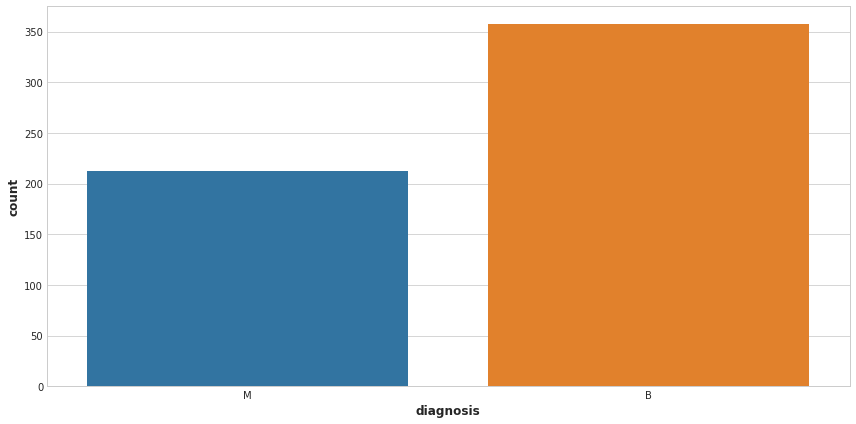

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='diagnosis', data=df)

In [11]:
df = df.drop(columns=['id'])

In [12]:
df.describe().T.style.background_gradient(cmap = CMAP)

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


In [13]:
#check missing value
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [15]:
df['diagnosis'] = df['diagnosis'].replace("M", 0)
df['diagnosis'] = df['diagnosis'].replace("B", 1)

In [16]:
#See Correlation Between Feature
df.corr().style.background_gradient(cmap = CMAP)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,0.012838,-0.567134,0.008303,-0.556141,-0.548236,0.067016,-0.292999,-0.253730,-0.408042,0.006522,-0.077972,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [17]:
df['diagnosis'] = df['diagnosis'].replace(0, "M")
df['diagnosis'] = df['diagnosis'].replace(1, "B")

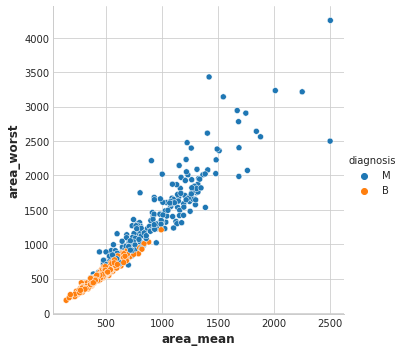

In [18]:
sns.relplot(x="area_mean", y="area_worst", hue='diagnosis', data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area_mean', ylabel='Density'>

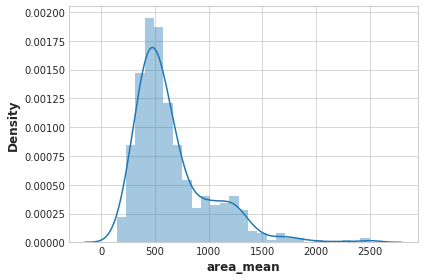

In [19]:
sns.distplot(df['area_mean'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area_worst', ylabel='Density'>

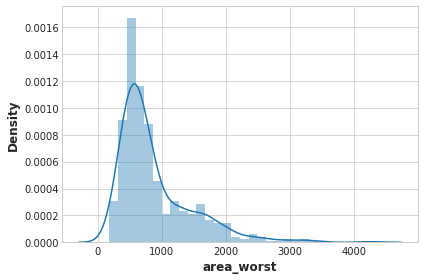

In [20]:
sns.distplot(df['area_worst'])

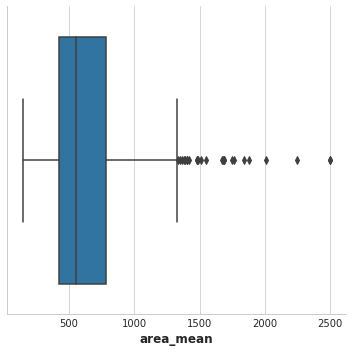

In [21]:
sns.catplot(x='area_mean', kind='box', data=df)

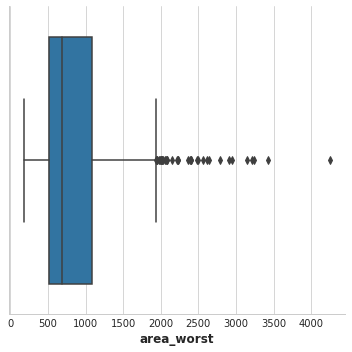

In [22]:
sns.catplot(x='area_worst', kind='box', data=df)

#Data Preprocessing

In [23]:
#Check Duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


#Data Manipulation

In [24]:
#scaler = MinMaxScaler(feature_range = (0 , 1))

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# list discrete features that have integer dtypes for using MI (Mutual Information)
discrete_features = X.dtypes == int

#Feature Selection

In [25]:
#use mutual information classify to select mutual feature
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

perimeter_worst            0.477050
area_worst                 0.464603
radius_worst               0.453348
concave points_mean        0.441545
concave points_worst       0.435519
perimeter_mean             0.403036
concavity_mean             0.374550
radius_mean                0.366989
area_mean                  0.361980
area_se                    0.340055
concavity_worst            0.315222
perimeter_se               0.277394
radius_se                  0.249368
compactness_worst          0.226748
compactness_mean           0.210725
concave points_se          0.125127
texture_worst              0.120878
concavity_se               0.117558
smoothness_worst           0.108460
symmetry_worst             0.096791
texture_mean               0.094593
smoothness_mean            0.076836
compactness_se             0.075228
fractal_dimension_worst    0.066160
symmetry_mean              0.061657
fractal_dimension_se       0.037614
smoothness_se              0.016348
symmetry_se                0

In [26]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0]

X = drop_uninformative(X, mi_scores)

#Model Building

In [32]:
accuracies = {}

ValueError: min() arg is an empty sequence

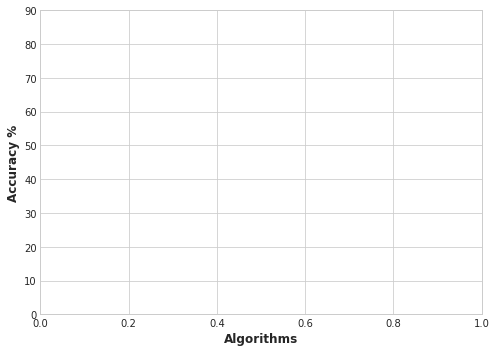

In [33]:
colors = ["purple", "green"]
sns.set_style("whitegrid")
plt.figure(figsize=(7,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier as dtc

decision_tree = dtc(random_state=0)
decision_tree.fit(X,y)

predict = cross_val_predict(estimator = decision_tree, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           B       0.95      0.92      0.93       357
           M       0.87      0.91      0.89       212

    accuracy                           0.92       569
   macro avg       0.91      0.92      0.91       569
weighted avg       0.92      0.92      0.92       569



In [28]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X, y)
predict = cross_val_predict(estimator = random_forest, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           B       0.97      0.98      0.97       357
           M       0.96      0.94      0.95       212

    accuracy                           0.96       569
   macro avg       0.96      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X,y)
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           B       0.93      0.96      0.94       357
           M       0.93      0.87      0.90       212

    accuracy                           0.93       569
   macro avg       0.93      0.92      0.92       569
weighted avg       0.93      0.93      0.93       569



In [30]:
from sklearn.svm import SVC

scv = SVC(gamma='auto')
scv.fit(X,y)
predict = cross_val_predict(estimator = scv, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           B       0.63      1.00      0.77       357
           M       0.00      0.00      0.00       212

    accuracy                           0.63       569
   macro avg       0.31      0.50      0.39       569
weighted avg       0.39      0.63      0.48       569



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
gnb = GaussianNB()
gnb.fit(X,y)
predict = cross_val_predict(estimator = gnb, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           B       0.94      0.97      0.95       357
           M       0.94      0.89      0.91       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.93       569
weighted avg       0.94      0.94      0.94       569

